In [2]:
# Coding up the circular slepians

In [3]:
using SpecialFunctions, FFTW, Plots, LinearAlgebra

# besselj(nu,z)

In [46]:
# Compute n! using either the factorial function (for small numbers, or using stirling's approximation)
function stirling_approx(n)
    try 
        factorial(n)
    catch
        sqrt(2 * pi * n) * (n / exp(1))^n
    end
end

# Equation (77) of Simons and Wang 2011 - circular bandlimitation and circular spacelimitation
function phi77(m, dl, gamma, c, zeta, lmax)
    out = 0
    for l = 0:lmax
        out += (dl[:,l+1]*stirling_approx(l)/stirling_approx(l+m)) * besselj(m + 2 * l + 1, c * zeta) / sqrt(c * zeta)
    end
    return out * stirling_approx(m) ./ gamma
end

# We now need to determine the dl's. They are the eigenvectors of the below matrix (eqn 78)
function constructT78(m, lmax, c)
    superdiag = -map(l -> c^2 * (m + l + 1)^2/((2 * l + m + 1) * (2 * l + m + 2)), 0:(lmax - 1))
    diagn = map(l -> (2 * l + m + 0.5) * (2 * l + m + 1.5) + c^2 / 2 * (1 + (m^2 / ((2 * l + m) * (2 * l + m + 2)))), 0:lmax)
    subdiag = -map(l -> c^2 * (l + 1)^2/((2 * l + m + 2) * (2 * l + m + 3)), 0:(lmax - 1))
    Matrix(Tridiagonal(subdiag, diagn, superdiag))
end

function dlfun(m, lmax, c)
    eigen(constructT78(m, lmax, c)).vectors
end


dlfun (generic function with 1 method)

In [47]:
stirling_approx(0)

1

In [48]:
# Second part of equation 79 - need to find gamma 
function gam(m, c, dls)   
    (c^(m + 0.5) * dls[:, 1])/(2^(m + 1) * factorial(m + 1)) ./ sum(dls, dims = 2)
end

# first part of equation 79
function lam(m, c, dls, N2D)
    2 * gam(m, c, dls).^2 * sqrt(N2D)
end

lam (generic function with 1 method)

In [49]:
m = 1
lmax = 40
c = 0.1

dl = dlfun(m, lmax, c)

41×41 Matrix{Float64}:
 1.0           -0.000555617    4.68777e-8    …   1.10087e-238   1.12932e-245
 6.94522e-5     1.0           -0.000225002      -1.05617e-232  -1.13835e-239
 2.89398e-9     6.66673e-5     1.0               1.49836e-226   1.69691e-233
 7.75193e-14    2.23218e-9     5.73981e-5       -2.50308e-220  -2.97909e-227
 1.43557e-18    4.7242e-14     1.59439e-9        4.56754e-214   5.71413e-221
 1.94208e-23    6.99013e-19    2.79601e-14   …  -8.79251e-208  -1.15654e-214
 2.00078e-28    7.68147e-24    3.45661e-19       1.75121e-201   2.42278e-208
 1.62102e-33    6.53459e-29    3.20784e-24      -3.56492e-195  -5.18961e-202
 1.05949e-38    4.43738e-34    2.32958e-29       7.35503e-189   1.12717e-195
 5.70304e-44    2.46319e-39    1.3642e-34       -1.52837e-182  -2.46714e-189
 2.57172e-49    1.13923e-44    6.59111e-40   …   3.18305e-176   5.41564e-183
 9.85544e-55    4.45932e-50    2.67554e-45      -6.61698e-170  -1.18747e-176
 3.24905e-60    1.49683e-55    9.26149e-51       1.36

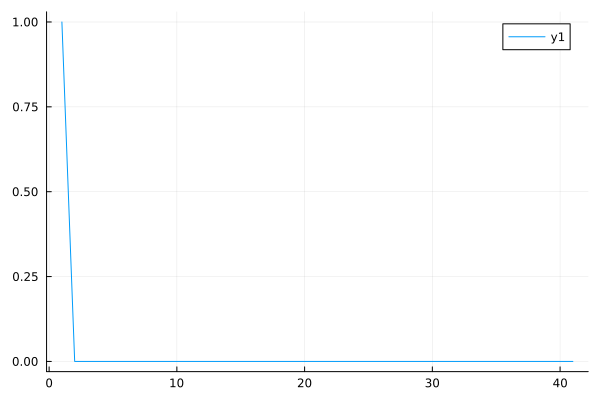

In [50]:
plot(dl[:,1])

In [51]:
gamma = gam(m, c, dl) 

phi77(m, dl, gamma, c, 0.1, lmax)

41×1 Matrix{Float64}:
   0.031604944475767026
 455.2427016888913
   1.0929221176844886e7
  -4.079467035047952e11
   2.2028441785364828e16
  -1.6283110096214533e21
   1.5805264363207443e26
  -1.9508026233000929e31
   2.984706499953726e36
  -5.544890124849347e41
   1.229629258477897e47
  -3.208649712774839e52
   9.732873854672374e57
   ⋮
  -1.7628670352408352e158
   2.844654908893183e164
  -4.883848185893323e170
   8.904472473721465e176
  -1.7210989353586653e183
   3.520759670392091e189
  -7.610632393180692e195
   1.7358662883553966e202
  -4.171707626121549e208
   1.0549586774970512e215
  -2.8037006746597047e221
   7.821252405879001e227